In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scienceplots
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

## Load data

In [38]:
df_wind_power   = pd.read_csv('./Kaggle Wind Power Forecasting Data/Turbine_Data.csv')
df_wind_turbine = pd.read_csv('./Kaggle Wind Turbine Power (kW) Generation Data/power.csv')
df_spanish      = pd.read_csv('./International Spanish Data.csv')
df_yumen        = pd.read_csv('./yumen.csv')

df_spanish.describe()

,ws0,wd0,onpower
count,18087.000000,18087.000000,17988.000000
mean,5.970865,173.388069,2955.932230
std,2.990040,96.471277,3555.648744
min,0.350000,0.000000,0.000000
25%,3.960000,91.000000,83.712500
50%,5.450000,167.000000,1515.720000
75%,7.440000,256.000000,4588.337500
max,27.130000,359.000000,16163.410000


## Describe

In [39]:
des_wind_power   = df_wind_power['ActivePower'].describe().to_frame().T
des_wind_turbine = df_wind_turbine['Power(kW)'].describe().to_frame().T
des_spanish      = df_spanish['onpower'].describe().to_frame().T
des_yumen        = df_yumen['onpower'].describe().to_frame().T

des_all       = pd.concat([des_wind_power, des_wind_turbine, des_spanish, des_yumen])
des_all.index = ['Wind_power', 'Wind_turbine', 'Spanish', 'Yumen']
des_all.to_csv('data_descriptions.csv')

des_all

,count,mean,std,min,25%,50%,75%,max
Wind_power,94750.0,619.109805,611.275373,-38.524659,79.642258,402.654893,1074.591780,1779.032433
Wind_turbine,136730.0,1138.556350,1078.419992,-48.596668,80.394167,778.220825,2310.443237,2779.423340
Spanish,17988.0,2955.932230,3555.648744,0.000000,83.712500,1515.720000,4588.337500,16163.410000
Yumen,4672.0,415.210385,515.920981,-1.860000,0.000000,175.640000,676.110000,1525.250000


In [54]:
y_wind_power   = df_wind_power['ActivePower'].to_frame()
y_wind_turbine = df_wind_turbine['Power(kW)'].to_frame()
y_spanish      = df_spanish['onpower'].to_frame()
y_yumen        = df_yumen['onpower'].to_frame()

y_spanish.describe()

,onpower
count,17988.000000
mean,2955.932230
std,3555.648744
min,0.000000
25%,83.712500
50%,1515.720000
75%,4588.337500
max,16163.410000


## Distribution plot

[[0.61960784 0.79215686 0.88235294 1.        ]
 [0.19215686 0.63921569 0.32941176 1.        ]
 [0.7372549  0.74117647 0.8627451  1.        ]
 [0.85098039 0.85098039 0.85098039 1.        ]]


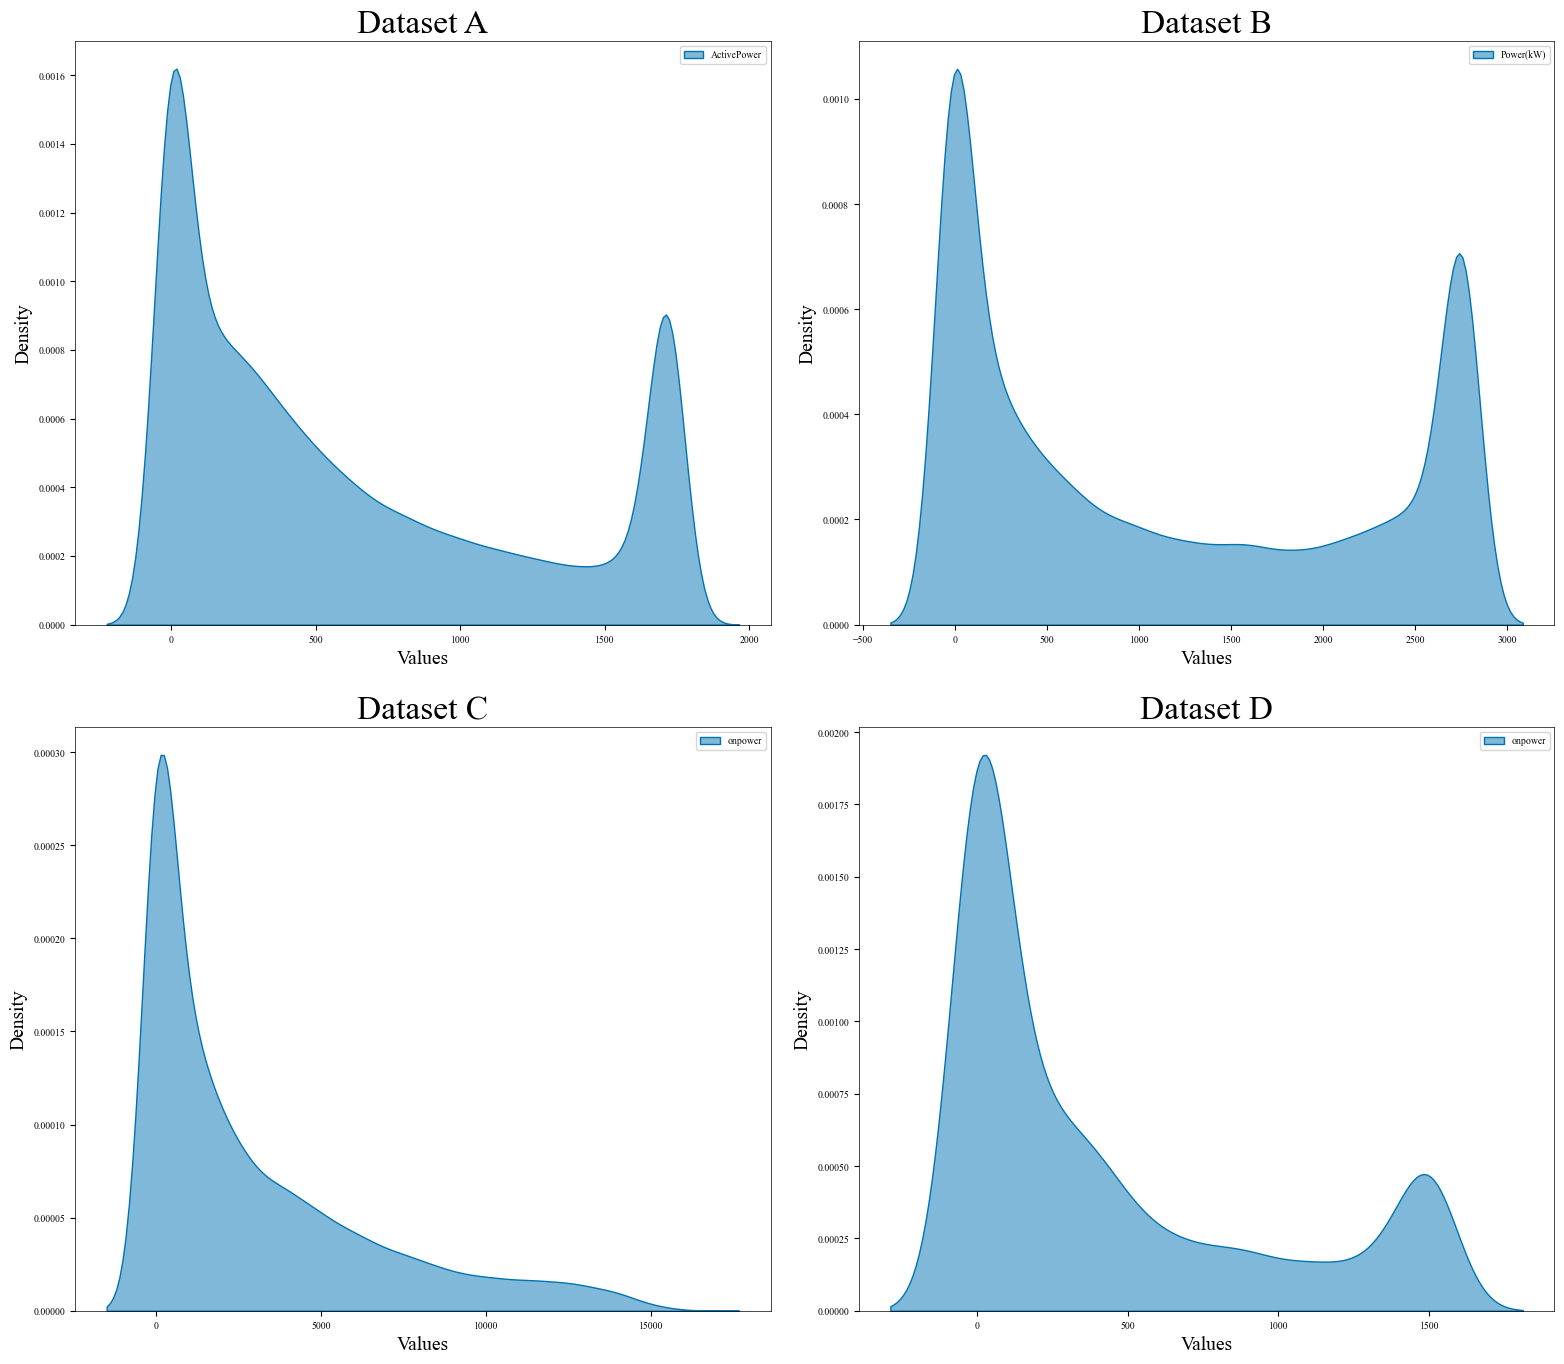

In [41]:
y_all     = [y_wind_power, y_wind_turbine, y_spanish, y_yumen]
titles    = ['Dataset A', 'Dataset B', 'Dataset C', 'Dataset D']
style     = ['nature']
figsize   = (16, 12)
font_dict = {'fontsize': 14}

colormap = plt.get_cmap('tab20c')
colors   = colormap(np.linspace(0.1, 1, len(y_all))) # 按百分比
print(colors)

with plt.style.context(style):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size']   = 20
    colormap = plt.get_cmap('tab20c')
    colors   = colormap(np.linspace(0.1, 1, len(y_all))) # 按百分比
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    for i, ax in enumerate(axes.flat):
        data = y_all[i]
        sns.kdeplot(data=data, fill=True, alpha=.5, color=colors[i], ax=ax)

        ax.set_xlabel('Values', fontdict=font_dict)
        ax.set_ylabel('Density', font_dict)
        ax.set_title(titles[i])  # Set the subplot title

# Adjust layout and save or display the figure
plt.tight_layout(pad=1)

# If you want to save the figure, provide a folder path and filename
# resultFolder = './paper'
# title = '4maps_scale_up'
# plt.savefig(f'{resultFolder}/{title}.png', dpi=600, bbox_inches='tight')
# plt.savefig(f'{resultFolder}/{title}.svg', dpi=600, bbox_inches='tight')

# If you want to display the figure, use plt.show()
plt.show()


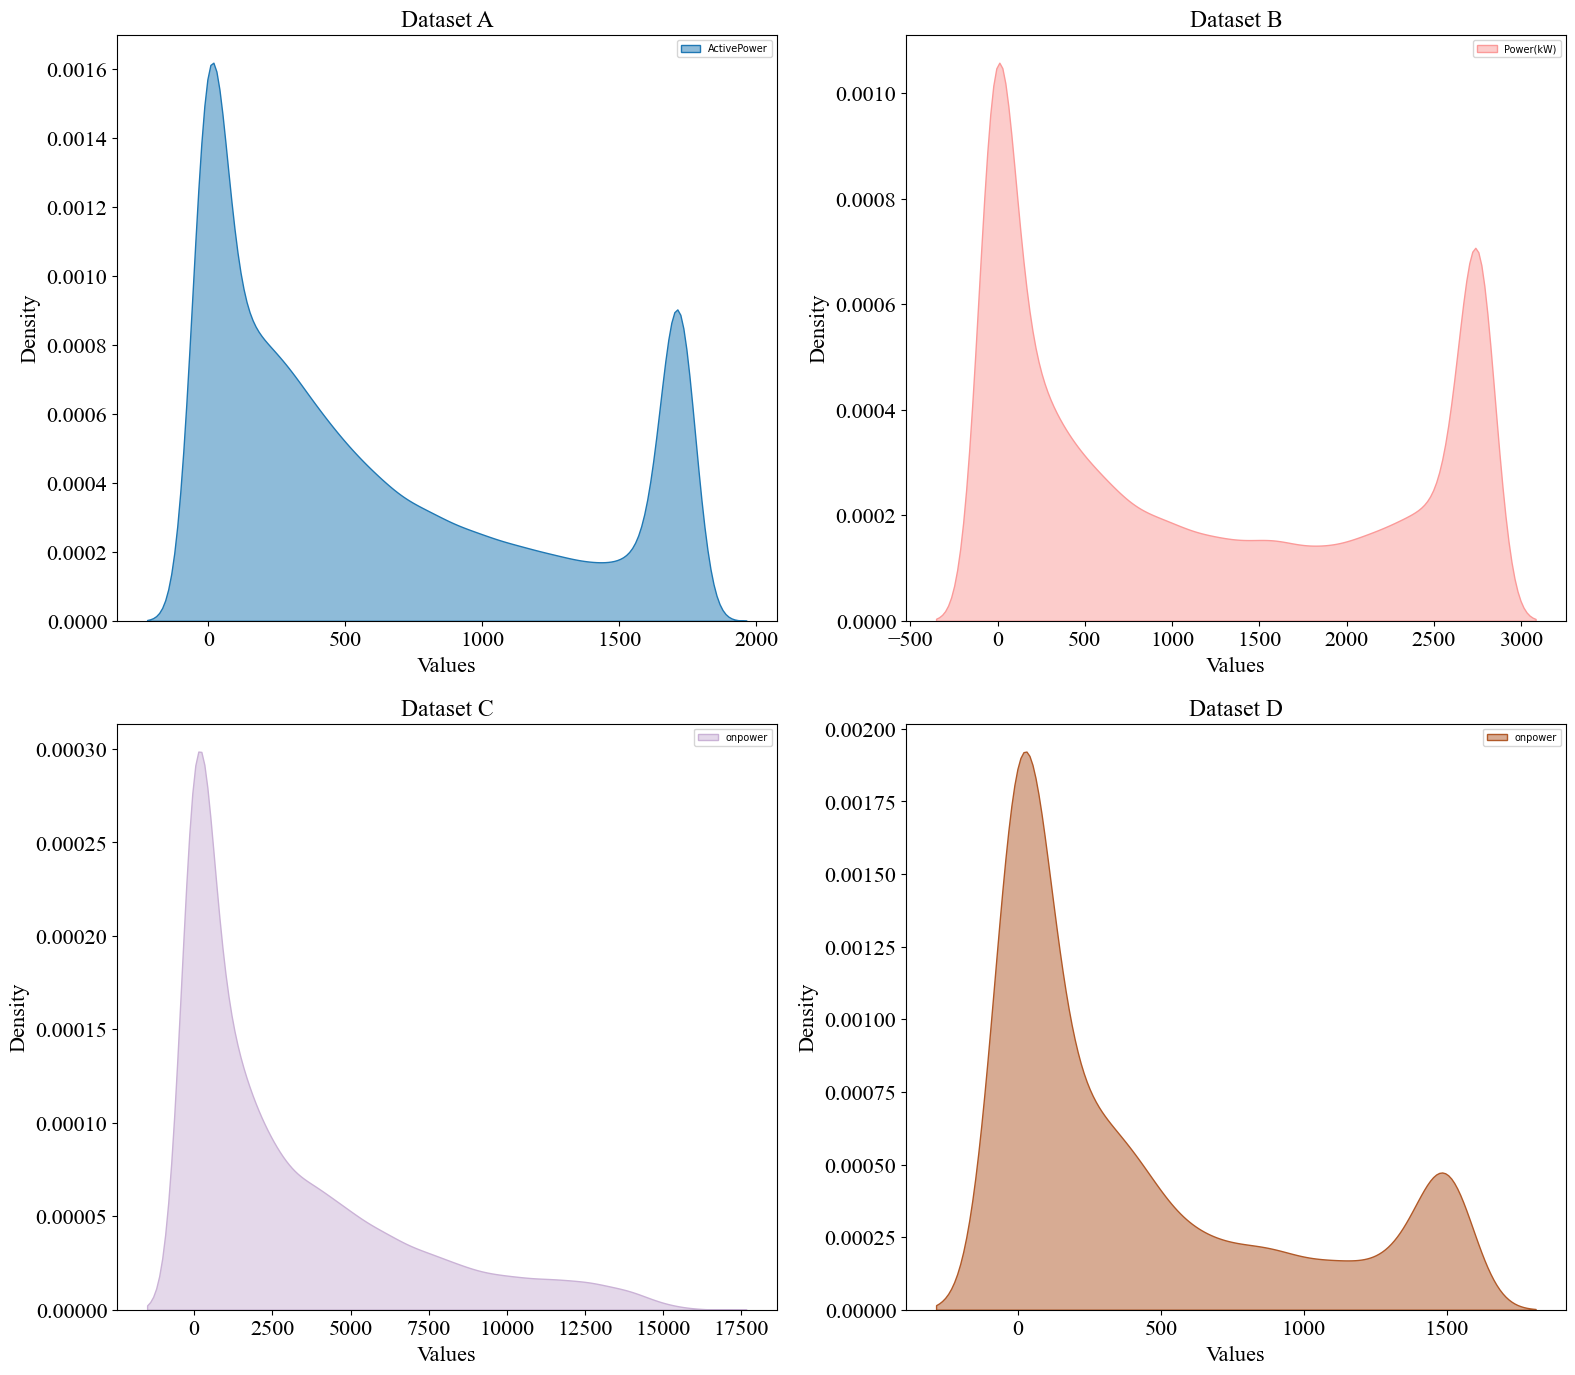

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
font_dict = {'fontsize': 17}

colormap = plt.get_cmap('Paired')  # Accent 'tab20'
colors = colormap(np.linspace(0.1, 1, len(y_all)))  # 按百分比


# 设置Seaborn风格
style = ['nature']
with plt.style.context(style):
    for i, ax in enumerate(axes.flat):
        data = y_all[i]
        sns.kdeplot(data=data, fill=True, alpha=.5, palette=[colors[i]], ax=ax)  # 通过palette指定颜色

        ax.set_xlabel('Values')
        ax.set_ylabel('Density')  # , fontdict=font_dict
        ax.set_title(titles[i], fontdict=font_dict)  # 设置子图标题

# 调整布局
plt.tight_layout(pad=1)

# 保存图片
resultFolder = './'
title = '4datasets_kdeplots'
plt.savefig(f'{resultFolder}/{title}.png', dpi=600, bbox_inches='tight')
plt.savefig(f'{resultFolder}/{title}.svg', dpi=600, bbox_inches='tight')

# 显示图形
plt.show()